In [ ]:
#try:
#  # This command only in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
#
#!unzip cats_and_dogs.zip
#
#PATH = 'cats_and_dogs'
#
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 50
epochs = 40
IMG_HEIGHT = 150
IMG_WIDTH = 150

Now it is your turn! Set each of the variables below correctly. (They should no longer equal `None`.)

Create image generators for each of the three image data sets (train, validation, test). Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size (`(IMG_HEIGHT, IMG_WIDTH)`), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.


After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

In [ ]:
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, 
    class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, 
    class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, 
    shuffle=False, 
    classes = ['.'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

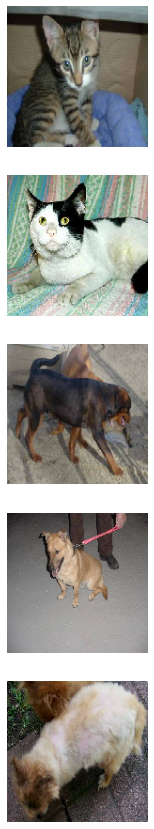

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Recreate the `train_image_generator` using `ImageDataGenerator`. 

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [ ]:
train_image_generator = ImageDataGenerator(
    horizontal_flip = True,  
    rotation_range = 90, 
    shear_range = 0.5, 
    width_shift_range = 0.2,
    height_shift_range = 0.3,
    zoom_range = 0.2, 
    rescale = 1./255)

You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


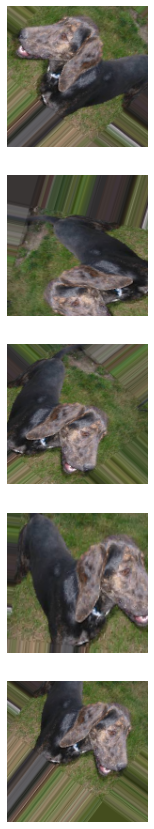

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = "relu", input_shape = (IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 512)       590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 147968)            0

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False), 
    metrics = ['accuracy']
)

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [ ]:
history = model.fit(
    x = train_data_gen,
    steps_per_epoch = int(total_train/batch_size), 
    epochs = epochs, 
    validation_data = val_data_gen, 
    validation_steps = int(total_val/batch_size))

Epoch 1/40
40/40 [==============================] - 40s 1s/step - loss: 0.7389 - accuracy: 0.4905 - val_loss: 0.6915 - val_accuracy: 0.5940
Epoch 2/40
40/40 [==============================] - 40s 1s/step - loss: 0.6915 - accuracy: 0.5225 - val_loss: 0.6820 - val_accuracy: 0.6040
Epoch 3/40
40/40 [==============================] - 40s 1s/step - loss: 0.6798 - accuracy: 0.5580 - val_loss: 0.6428 - val_accuracy: 0.6060
Epoch 4/40
40/40 [==============================] - 40s 1s/step - loss: 0.6719 - accuracy: 0.5565 - val_loss: 0.6459 - val_accuracy: 0.5990
Epoch 5/40
40/40 [==============================] - 41s 1s/step - loss: 0.6654 - accuracy: 0.5725 - val_loss: 0.6569 - val_accuracy: 0.6280
Epoch 6/40
40/40 [==============================] - 41s 1s/step - loss: 0.6479 - accuracy: 0.5995 - val_loss: 0.6563 - val_accuracy: 0.5900
Epoch 7/40
40/40 [==============================] - 40s 1s/step - loss: 0.6432 - accuracy: 0.5975 - val_loss: 0.6270 - val_accuracy: 0.6770
Epoch 8/40
40/40 [==

Run the next cell to visualize the accuracy and loss of the model.

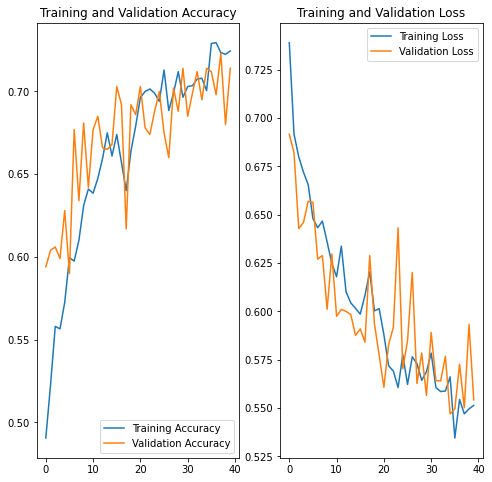

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers. 

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [ ]:
probabilities = model.predict(test_data_gen).flatten()
print(probabilities)

[0.83989906 0.33264086 0.05654449 0.91594577 0.5047671  0.52341914
 0.8099736  0.28649017 0.900976   0.9870564  0.22317925 0.5610452
 0.48426092 0.42753413 0.67745143 0.8731014  0.80524564 0.9332646
 0.58071405 0.6919735  0.11929187 0.6901003  0.3140216  0.7578298
 0.51476574 0.39706382 0.9905219  0.52639776 0.34072864 0.72051126
 0.48890114 0.11601923 0.9516367  0.998384   0.409052   0.7759257
 0.99900836 0.86565125 0.5243983  0.56541073 0.40790457 0.18909137
 0.9205254  0.81034195 0.08284362 0.3038149  0.64182854 0.39395192
 0.46904767 0.48951134]


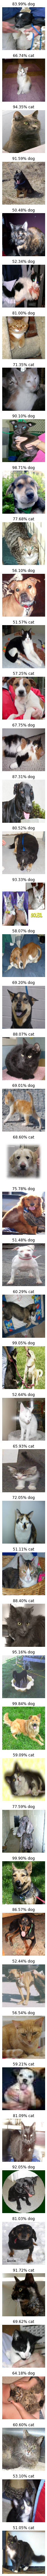

In [ ]:
plotImages(test_data_gen[0][0], probabilities)

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.72% of the images of cats and dogs.
You passed the challenge!
